In [109]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

sns.set_style('whitegrid')
colors = sns.color_palette("pastel")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [26]:
list_df = []

list_name = os.listdir('Dataset/현역병_모집실적')
for name in list_name:
    year = name.split('(')[1][:4]
    mil_type = name.split(' ')[0][:-1]
    
    path = f'Dataset/현역병_모집실적/{name}'
    df = pd.read_csv(path, encoding = 'cp949')
    df['연도'] = year
    df['종류'] = mil_type
    list_df.append(df)
    
df = pd.concat(list_df, axis = 0).reset_index(drop = True)
df.dtypes

구분      object
지원      object
선발      object
선발취소     int64
연기       int64
입영      object
귀가       int64
실입영     object
연도      object
종류      object
dtype: object

In [27]:
for row in range(len(df)):
    for i in range(1, 8):
        try:
            df.iloc[row, i] = int(df.iloc[row, i].replace(',', ''))
        except:
            pass
df

,구분,지원,선발,선발취소,연기,입영,귀가,실입영,연도,종류
0,서울,10463,3968,95,54,3819,199,3620,2017,공군
1,부산,5111,1678,28,17,1633,91,1542,2017,공군
2,대구/경북,7184,2335,38,32,2265,113,2152,2017,공군
3,경인,7760,2611,65,47,2499,124,2375,2017,공군
4,광주/전남,4365,1721,30,15,1676,94,1582,2017,공군
...,...,...,...,...,...,...,...,...,...,...
387,경남,1384,857,22,12,823,47,776,2023,해병대
388,제주,390,267,5,4,258,20,238,2023,해병대
389,인천,1825,1269,25,15,1229,89,1140,2023,해병대
390,경기/북부,938,648,6,6,636,46,590,2023,해병대


In [29]:
df_g = pd.DataFrame(df.groupby(['구분', '연도'])[df.columns[1:-2]].sum()).reset_index()
df_g

,구분,연도,지원,선발,선발취소,연기,입영,귀가,실입영
0,강원,2017,4737,2597,62,44,2491,105,2386
1,강원,2018,4751,2576,56,36,2484,95,2389
2,강원,2019,4104,2369,64,16,2289,69,2280
3,강원,2020,5381,2864,61,54,2749,113,2636
4,강원,2021,6140,2360,49,32,2279,95,2184
...,...,...,...,...,...,...,...,...,...
93,충북,2019,7385,3965,64,44,3857,147,3710
94,충북,2020,9344,4563,66,75,4422,192,4230
95,충북,2021,12392,4185,63,47,4075,181,3894
96,충북,2022,8016,3261,46,121,3094,198,2896


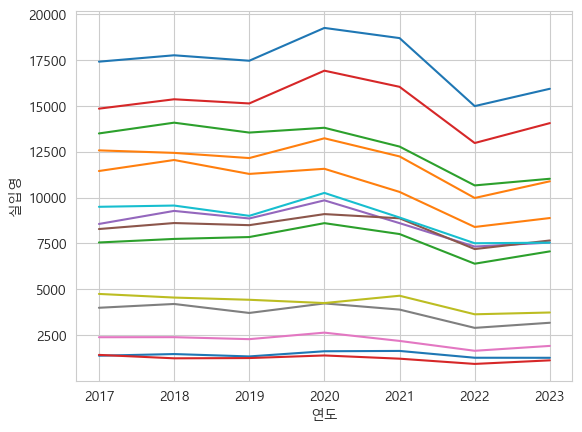

In [30]:
list_year = df['연도'].unique()
list_city = df['구분'].unique()

for city in list_city:
    df_c = df_g[df_g['구분'] == city]
    sns.lineplot(x = df_c['연도'], y = df_c['실입영'])

In [34]:
list_col = []
list_tstat = []
list_pval = []

for col in df_g.columns[2:]:
    
    count_2020 = df_g[df_g['연도'] == '2020'][col]
    count_2023 = df_g[df_g['연도'] == '2023'][col]

    t_statistic, p_value = ttest_rel(count_2020, count_2023)

    list_col.append(col)
    list_tstat.append(t_statistic)
    list_pval.append(p_value)
    
    print(f"{col} t-통계량: {t_statistic}")
    print(f"{col} p-값: {p_value}")
    print()

지원 t-통계량: 5.875402064879808
지원 p-값: 5.452249990848243e-05

선발 t-통계량: 6.20619676719421
선발 p-값: 3.187113800618822e-05

선발취소 t-통계량: 3.3297039224189042
선발취소 p-값: 0.005428504267608093

연기 t-통계량: 2.002087643322367
연기 p-값: 0.06659091703661178

입영 t-통계량: 6.3989924101137285
입영 p-값: 2.347099187278057e-05

귀가 t-통계량: 6.461338768275047
귀가 p-값: 2.128331723891488e-05

실입영 t-통계량: 6.290677410074084
실입영 p-값: 2.7855033129512497e-05



In [48]:
df_t = pd.DataFrame([list_col, list_tstat, list_pval]).T
df_t.columns = ['변수명', 't-통계량', 'p-값']
df_t.index = df_t['변수명']
df_t = df_t[['t-통계량', 'p-값']]
df_t.T

변수명,지원,선발,선발취소,연기,입영,귀가,실입영
t-통계량,5.875402,6.206197,3.329704,2.002088,6.398992,6.461339,6.290677
p-값,0.000055,0.000032,0.005429,0.066591,0.000023,0.000021,0.000028


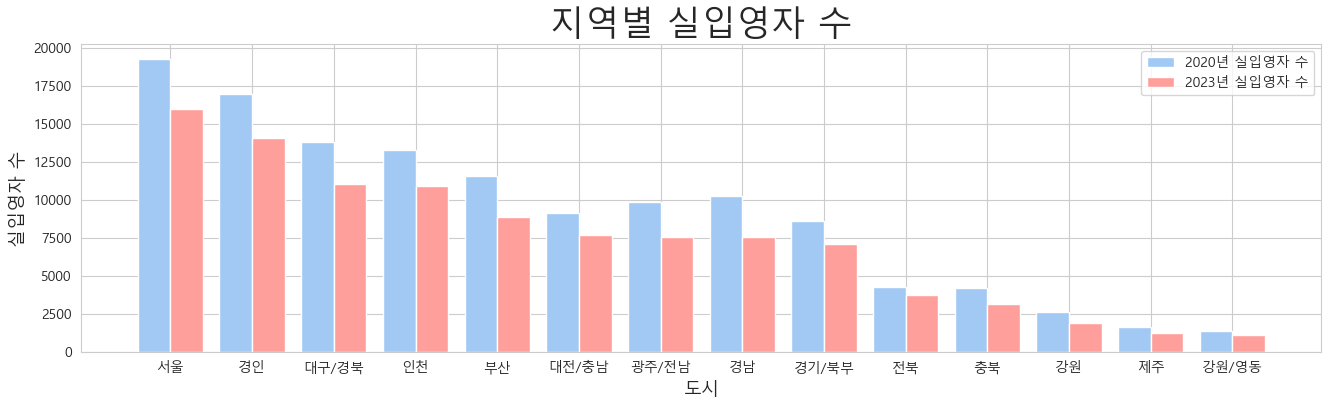

In [108]:
col = '실입영'
cities = df_g[df_g['연도'] == '2023'].sort_values(by = '실입영', ascending = False)['구분']

count_2020 = [df_g[(df_g['연도'] == '2020') & (df_g['구분'] == city)]['실입영'].values[0] for city in cities]
count_2023 = [df_g[(df_g['연도'] == '2023') & (df_g['구분'] == city)]['실입영'].values[0] for city in cities]

index = np.arange(len(cities))
bar_width = 0.4

plt.figure(figsize = (16, 4))

plt.bar(index - bar_width / 2, count_2020, color = colors[0], width = bar_width, label = '2020년 실입영자 수')
plt.bar(index + bar_width / 2, count_2023, color = colors[3], width = bar_width, label = '2023년 실입영자 수')

plt.title('지역별 실입영자 수', fontsize = 25)
plt.xticks(np.arange(0, len(cities), 1), cities)
plt.xlabel('도시', size = 13)
plt.ylabel('실입영자 수', size = 13)
plt.legend()
plt.show()